# Statistical Analysis
- cumulative distribution function
- skew and kurtosis of data

In [157]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from datetime import date
import pandas as pd
import scipy

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Data

### Depths

In [3]:
depth_EB = [50, 75, 100, 250, 500, 750, 950, 1000, 1250, 1500, 1600, 1750]
depth_WB = [50, 75, 100, 250, 500, 750, 1000, 1250, 1500, 1600, 1750]

### Gridded Dataset

In [4]:
file_name = "data/Rockall-Trough-Mooring-Time-Series-2020.nc"
ds = xr.open_dataset(file_name)

ds.coords['DEPTH'] = ds.PRES

ds['TG_EAST_C'] = ds.TG_EAST-273.15
ds.TG_EAST_C.attrs = ds.TG_EAST.attrs 
ds.TG_EAST_C.attrs['units'] = 'degC'
ds.TG_EAST_C.attrs

ds['TG_WEST_C'] = ds.TG_WEST-273.15
ds.TG_WEST_C.attrs = ds.TG_WEST.attrs 
ds.TG_WEST_C.attrs['units'] = 'degC'
ds.TG_WEST_C.attrs;

ds = ds[['TG_EAST_C', 'TG_WEST_C']] #, 'SG_EAST', 'SG_WEST']]
ds1D = ds.resample(TIME = "1D").mean(keep_attrs=True)

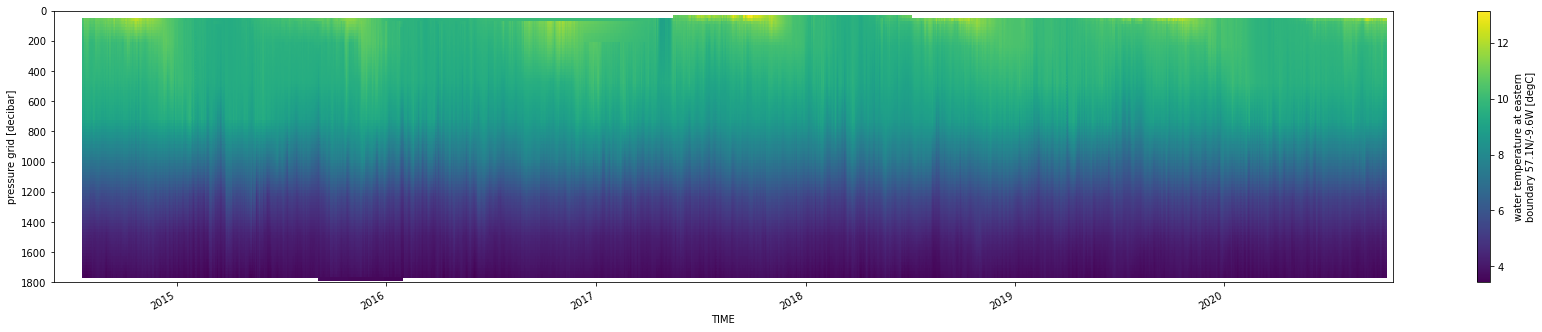

In [70]:
ds1D.TG_EAST_C.plot(x='TIME', figsize=(30,5), ylim=(1800,0));

# Function

In [98]:
def plt_parameters(data, bins):
    count, bins_count = np.histogram(data, bins=bins, range=[np.nanmin(data),np.nanmax(data)])
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    return bins_count, pdf, cdf
    

# Distribution

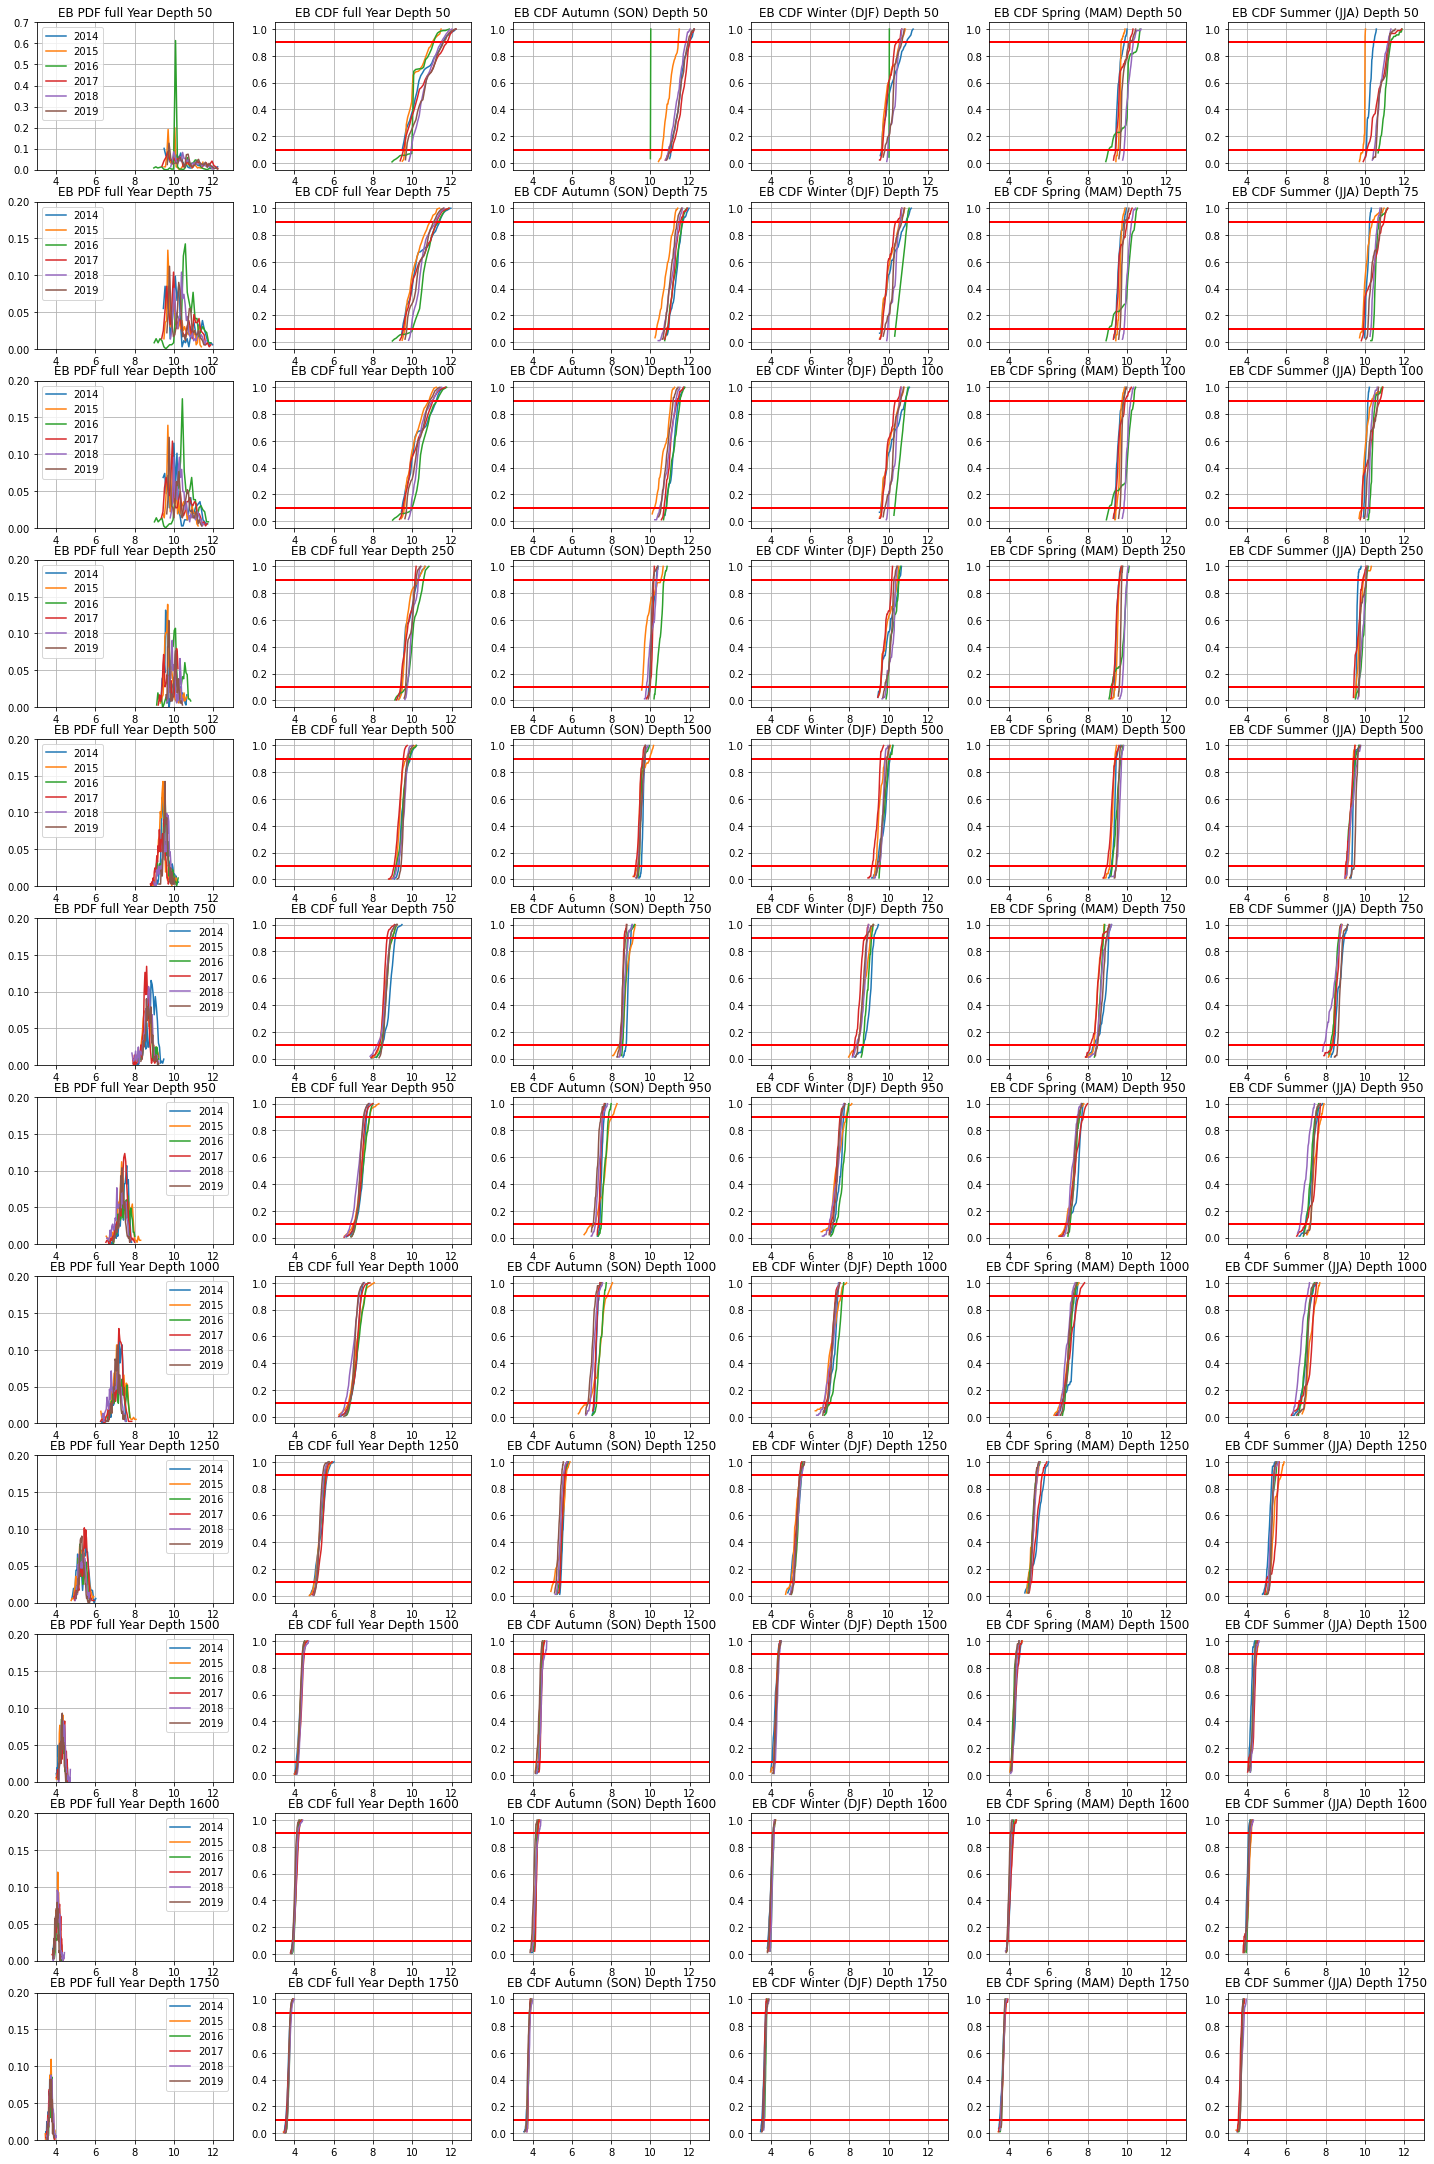

In [136]:
# EB
fig, ax = plt.subplots(len(depth_EB),6, figsize=(20,30))#, sharex=True, sharey=True)
fig.tight_layout()
m=0
for n in depth_EB:
    for y in [2014,2015,2016,2017,2018,2019]:
        y2 = y+1
        b = 0
        EB = np.array(ds1D.TG_EAST_C.sel(TIME=slice(f'{y}-09-01', f'{y2}-08-31')).sel(DEPTH=n, method='nearest'))
        EB_aut = np.array(ds1D.TG_EAST_C.sel(TIME=slice(f'{y}-09-01', f'{y}-11-30')).sel(DEPTH=n, method='nearest'))
        EB_wint = np.array(ds1D.TG_EAST_C.sel(TIME=slice(f'{y}-12-01', f'{y2}-02-28')).sel(DEPTH=n, method='nearest'))
        EB_spr = np.array(ds1D.TG_EAST_C.sel(TIME=slice(f'{y2}-03-01', f'{y2}-05-31')).sel(DEPTH=n, method='nearest'))
        EB_sum = np.array(ds1D.TG_EAST_C.sel(TIME=slice(f'{y2}-06-01', f'{y2}-08-31')).sel(DEPTH=n, method='nearest'))
        for t, bla in zip(['full Year', 'Autumn (SON)', 'Winter (DJF)', 'Spring (MAM)', 'Summer (JJA)'],[EB, EB_aut, EB_wint, EB_spr, EB_sum]):
            if any(~np.isnan(bla)):
                bins_count, pdf, cdf = plt_parameters(bla, 30)
                if t == ('full Year'):
                    ax[m,b].set_title(f'EB PDF {t} Depth {n}')
                    ax[m,b].plot(bins_count[1:], pdf, label=f"{y}")
                    ax[m,b].set_ylim(0,0.2)
                    ax[0,b].set_ylim(0,0.7)
                    ax[m,b].set_xlim(3,13)
                    ax[m,b].grid(True)
                    b=b+1
                ax[m,b].axhline(y = 0.1, color = 'r')
                ax[m,b].axhline(y = 0.9, color = 'r')
                ax[m,b].set_title(f'EB CDF {t} Depth {n}')
                ax[m,b].plot(bins_count[1:], cdf, label=f"{y}")
                ax[m,b].set_ylim(-0.05,1.05)
                ax[m,b].set_xlim(3,13)
                ax[m,b].grid(True)
            b=b+1
    ax[m,0].legend()        
    m=m+1;
#fig.savefig('figures/Stats/EB_stats_pdf+cdf_30bins', dpi = 300)

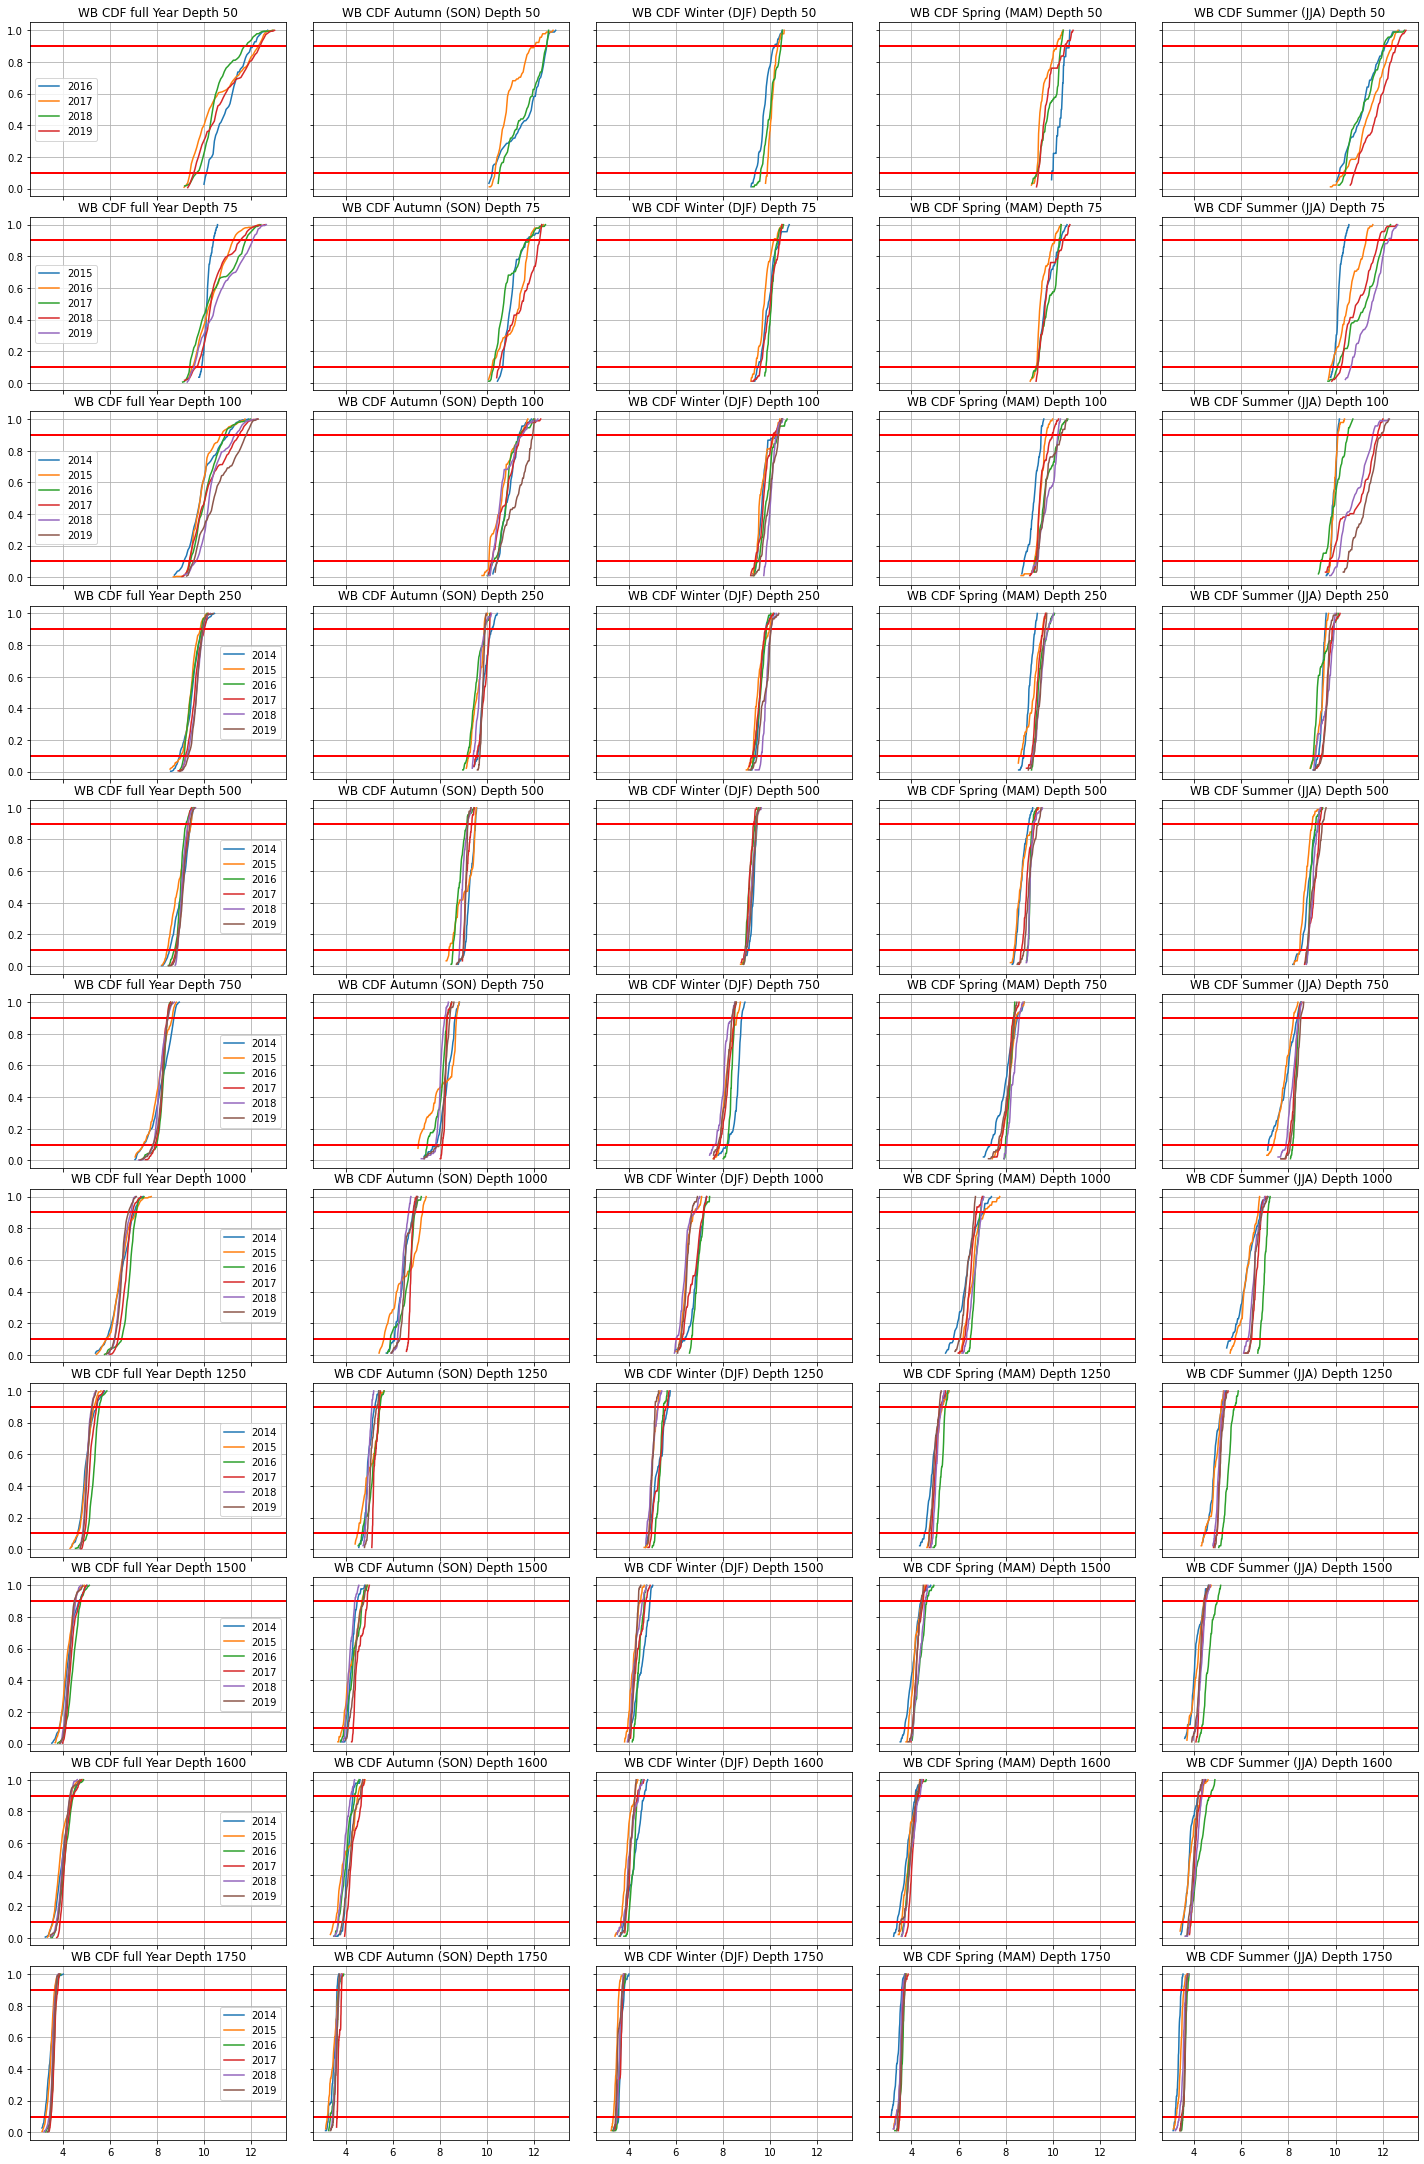

In [132]:
# WB
data = ds1D.TG_WEST_C
boundary = 'WB'
depth = depth_WB

fig, ax = plt.subplots(len(depth),5, figsize=(20,30), sharex=True, sharey=True)
fig.tight_layout()
m=0
for n in depth:
    for y in [2014,2015,2016,2017,2018,2019]:
        y2 = y+1
        b = 0
        year = np.array(data.sel(TIME=slice(f'{y}-09-01', f'{y2}-08-31')).sel(DEPTH=n, method='nearest'))
        autumn = np.array(data.sel(TIME=slice(f'{y}-09-01', f'{y}-11-30')).sel(DEPTH=n, method='nearest'))
        winter = np.array(data.sel(TIME=slice(f'{y}-12-01', f'{y2}-02-28')).sel(DEPTH=n, method='nearest'))
        spring = np.array(data.sel(TIME=slice(f'{y2}-03-01', f'{y2}-05-31')).sel(DEPTH=n, method='nearest'))
        summer = np.array(data.sel(TIME=slice(f'{y2}-06-01', f'{y2}-08-31')).sel(DEPTH=n, method='nearest'))
        for t, bla in zip(['full Year', 'Autumn (SON)', 'Winter (DJF)', 'Spring (MAM)', 'Summer (JJA)'],[year, autumn, winter, spring, summer]):
            if any(~np.isnan(bla)):
                bins_count, pdf, cdf = plt_parameters(bla, 50)
                #if t == ('full Year'):
                #    ax[m,b].set_title(f'{boundary} PDF {t} Depth {n}')
                #    ax[m,b].plot(bins_count[1:], pdf, label=f"{y}")
                #    ax[m,b].set_ylim(0,0.2)
                #    ax[0,b].set_ylim(0,0.7)
                #    ax[m,b].set_xlim(3,13)
                #    ax[m,b].grid(True)
                #    b=b+1
                ax[m,b].axhline(y = 0.1, color = 'r')
                ax[m,b].axhline(y = 0.9, color = 'r')
                ax[m,b].set_title(f'{boundary} CDF {t} Depth {n}')
                ax[m,b].plot(bins_count[1:], cdf, label=f"{y}")
                #ax[m,b].set_ylim(-0.05,1.05)
                #ax[m,b].set_xlim(3,13)
                ax[m,b].grid(True)
            b=b+1
    ax[m,0].legend()        
    m=m+1;
#fig.savefig('figures/Stats/WB_stats_cdf', dpi = 300)

In [220]:
display(bins_count)
pdf

array([3.4242249, 3.4299476, 3.4356704, 3.4413934, 3.4471161, 3.452839 ,
       3.4585617, 3.4642844, 3.4700074, 3.4757302, 3.481453 , 3.4871757,
       3.4928985, 3.4986215, 3.5043442, 3.510067 , 3.5157897, 3.5215125,
       3.5272355, 3.5329583, 3.538681 , 3.5444038, 3.5501266, 3.5558496,
       3.5615723, 3.567295 , 3.5730178, 3.5787406, 3.5844636, 3.5901864,
       3.595909 , 3.6016319, 3.6073546, 3.6130776, 3.6188004, 3.6245232,
       3.630246 , 3.6359687, 3.6416917, 3.6474144, 3.6531372, 3.65886  ,
       3.6645827, 3.6703057, 3.6760285, 3.6817513, 3.687474 , 3.6931968,
       3.6989198, 3.7046425, 3.7103653, 3.716088 , 3.7218108, 3.7275338,
       3.7332566, 3.7389793, 3.744702 , 3.7504249, 3.7561479, 3.7618706,
       3.7675934, 3.7733161, 3.779039 , 3.784762 , 3.7904847, 3.7962074,
       3.8019302, 3.807653 , 3.813376 , 3.8190987, 3.8248215, 3.8305442,
       3.836267 , 3.84199  , 3.8477128, 3.8534355, 3.8591583, 3.864881 ,
       3.870604 , 3.8763268, 3.8820496, 3.8877723, 

array([0.0004562 , 0.        , 0.00091241, 0.        , 0.        ,
       0.0004562 , 0.0004562 , 0.00136861, 0.0004562 , 0.        ,
       0.00091241, 0.00228102, 0.00136861, 0.00091241, 0.00273723,
       0.00136861, 0.00319343, 0.00182482, 0.00182482, 0.00228102,
       0.00136861, 0.00364964, 0.00501825, 0.00228102, 0.00684307,
       0.00501825, 0.00638686, 0.00912409, 0.00912409, 0.00821168,
       0.00729927, 0.0100365 , 0.0104927 , 0.01459854, 0.01551095,
       0.01596715, 0.01277372, 0.01642336, 0.01733577, 0.02509124,
       0.02235401, 0.02417883, 0.0205292 , 0.02326642, 0.02554745,
       0.02326642, 0.02919708, 0.02372263, 0.02463504, 0.02828467,
       0.02737226, 0.0205292 , 0.02372263, 0.03786496, 0.02600365,
       0.0314781 , 0.02828467, 0.02326642, 0.02691606, 0.02326642,
       0.02326642, 0.02189781, 0.02509124, 0.02007299, 0.01870438,
       0.01596715, 0.00912409, 0.00958029, 0.01368613, 0.0104927 ,
       0.01414234, 0.00912409, 0.00912409, 0.00775547, 0.01094

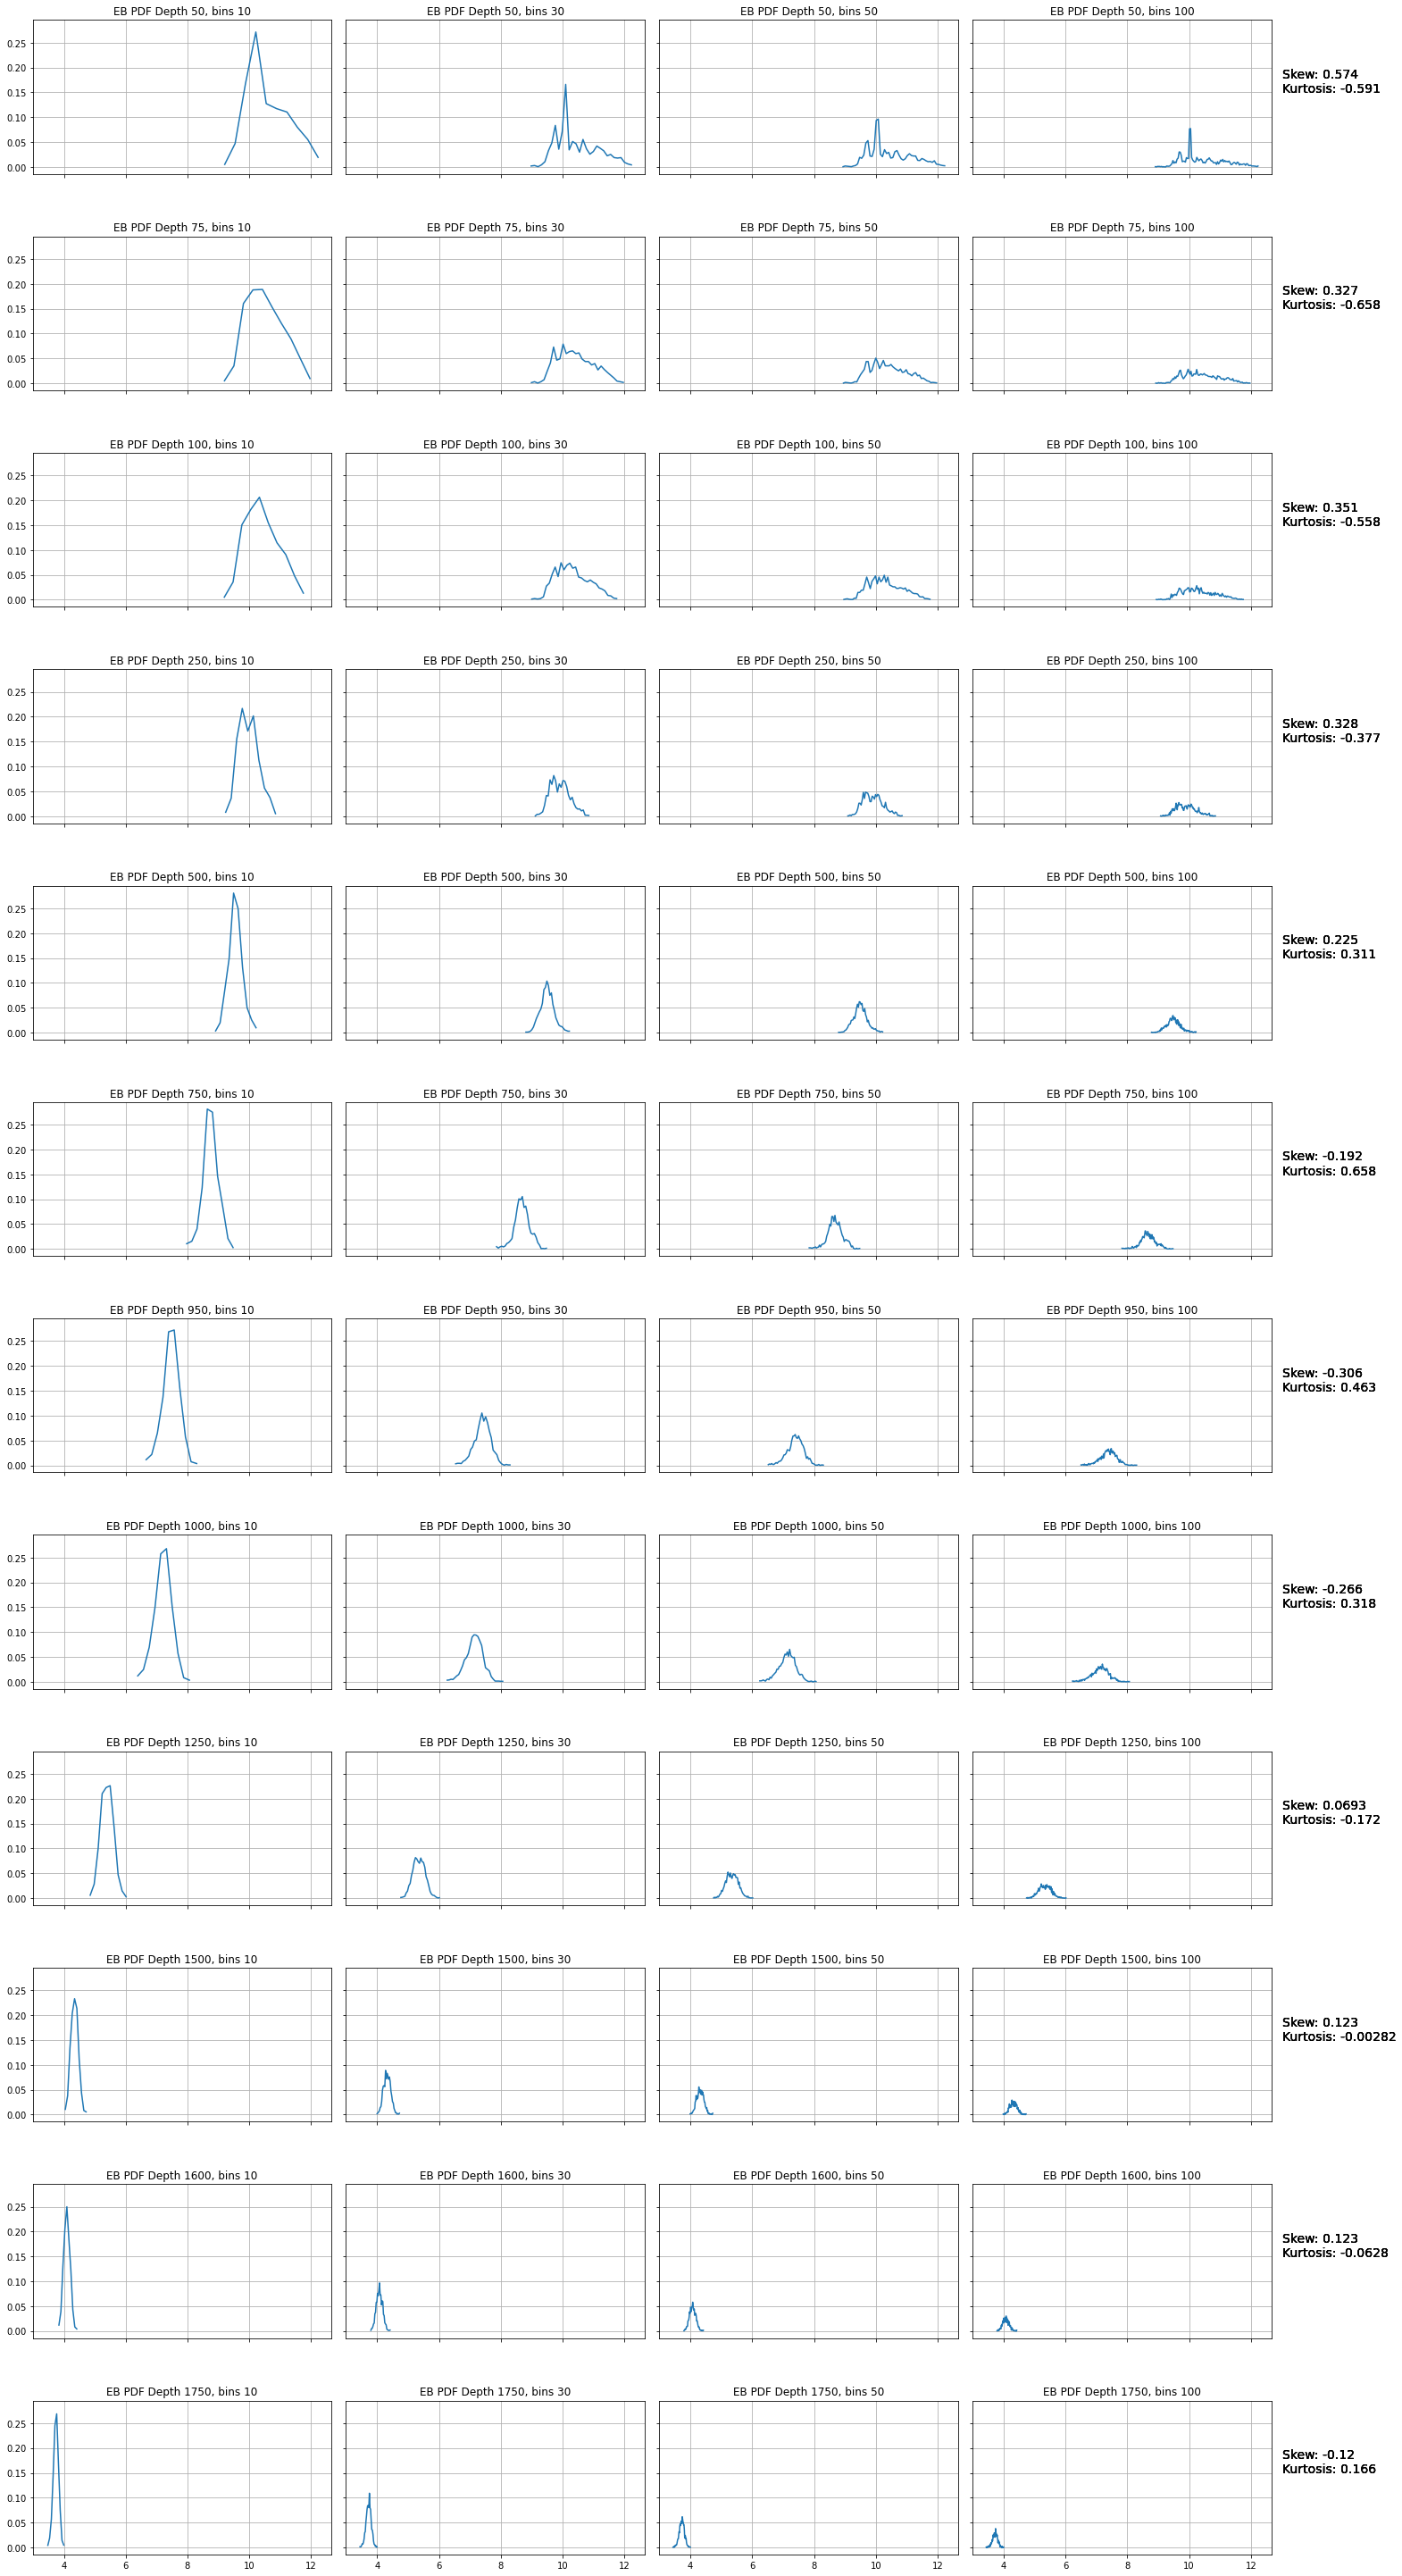

In [248]:
data = ds1D.TG_EAST_C
boundary = 'EB'
depth = depth_EB

fig, ax = plt.subplots(len(depth),4, figsize=(20,40), sharex=True, sharey=True)
fig.tight_layout(h_pad=6, w_pad=0)
b=0
for bins in [10,30,50,100]:
    m=0
    for n in depth:    
    #for y in [2014,2015,2016,2017,2018,2019]:
        #y2 = y+1
        year = np.array(data.sel(TIME=slice(f'2014-09-01', f'2020-08-31')).sel(DEPTH=n, method='nearest'))
        if any(~np.isnan(year)):
            bins_count, pdf, cdf = plt_parameters(year, bins)
            ax[m,b].set_title(f'{boundary} PDF Depth {n}, bins {bins}')
            ax[m,b].plot(bins_count[1:], pdf, label=f"{y}")
            ax[m,b].grid(True)

            skew = scipy.stats.skew(year)
            kurtosis = scipy.stats.kurtosis(year)
            ax[m,3].text(13, 0.15, f'Skew: {skew:.3} \nKurtosis: {kurtosis:.3}', fontsize= '14')
            #ax[m,b].legend()  
        m=m+1
    b=b+1
#fig.savefig('figures/Stats/EB_stats_pdf_different_bins_skew_kurtosis', dpi = 300, bbox_inches='tight')

#don't think this is actually that useful since it gives us the z-score and p-value but I think we are more interested 
#in the general skew and kurtosis
#skewtest = scipy.stats.skewtest(year) 
#kurtosistest = scipy.stats.kurtosistest(year)


In [239]:
np.histogram

Signature:
np.histogram(
    a,
    bins=10,
    range=None,
    normed=None,
    weights=None,
    density=None,
)
Docstring:
Compute the histogram of a set of data.

Parameters
----------
a : array_like
    Input data. The histogram is computed over the flattened array.
bins : int or sequence of scalars or str, optional
    If `bins` is an int, it defines the number of equal-width
    bins in the given range (10, by default). If `bins` is a
    sequence, it defines a monotonically increasing array of bin edges,
    including the rightmost edge, allowing for non-uniform bin widths.

    .. versionadded:: 1.11.0

    If `bins` is a string, it defines the method used to calculate the
    optimal bin width, as defined by `histogram_bin_edges`.

range : (float, float), optional
    The lower and upper range of the bins.  If not provided, range
    is simply ``(a.min(), a.max())``.  Values outside the range are
    ignored. The first element of the range must be less than or
    equal to t